# Imaging

## Plotting penetration depth using the Niblett-Bostick transform

### Penetration depth as a function of period for 1 site

Here, we plot the Niblett-Bostick depth as a function of period/frequency for one site.

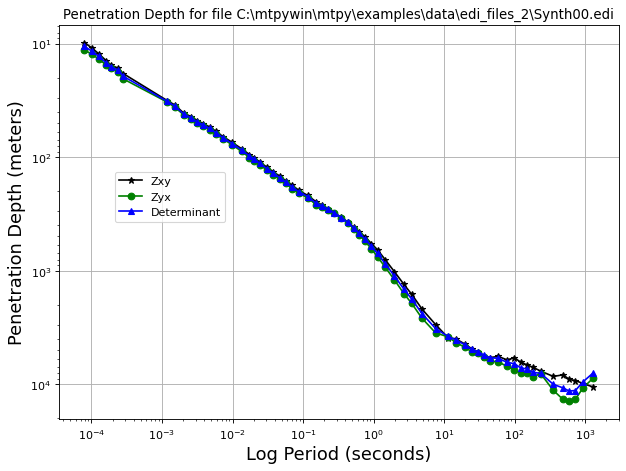

In [2]:
# Import required modules
import os
from mtpy.imaging import penetration_depth1d as pd1d

# Define edi file 
edi_file = r"C:/mtpywin/mtpy/examples/data/edi_files_2/Synth00.edi"
    
# Define file to save to
save_file = r"C:/tmp/penetration_depth1d.png"

# Create a plot of penetration depth and save to file
pd1d.plot_edi_file(edi_file, savefile=save_file, fig_dpi=400)

### Penetration depth for selected periods along a profile

Here, we plot the Niblett-Bostick depth as a function of distance along a profile, for selected periods

Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq a

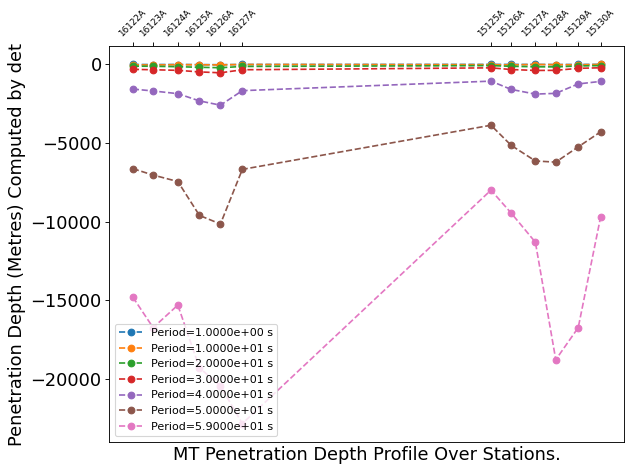

In [2]:
#Import required modules
from mtpy.imaging import penetration_depth2d as pen2d

#Define a path containing all the edi files in the profile & a savepath
edi_path = r'C:/mtpywin/mtpy/data/edifiles'
savepath = r'C:/tmp/plot.png'

# Choose indices of periods to plot
period_index_list = [1, 10, 20, 30, 40, 50, 59]

# Plot profiles for different modes ('det','zxy' or 'zyx')
pen2d.plot2Dprofile(edi_path, period_index_list, 'det', 
                    period_by_index = True,
                    marker='o', 
                    save=True,
                    savepath=savepath
                   )

# To save any of these figures:
#plt.savefig(os.path.join(savepath,'penetration_depth_profile.png'), dpi=400)

### Penetration depth for a selected period as a map

Here, we plot the Niblett-Bostick depth for one period, and interpolate between stations on a map.

plotting for period 0.03938403371273286


C:\mtpywin\mtpy\mtpy\imaging\penetration.py:391: RuntimeWarning: invalid value encountered in less
  if z_unit == 'km':  # change to km


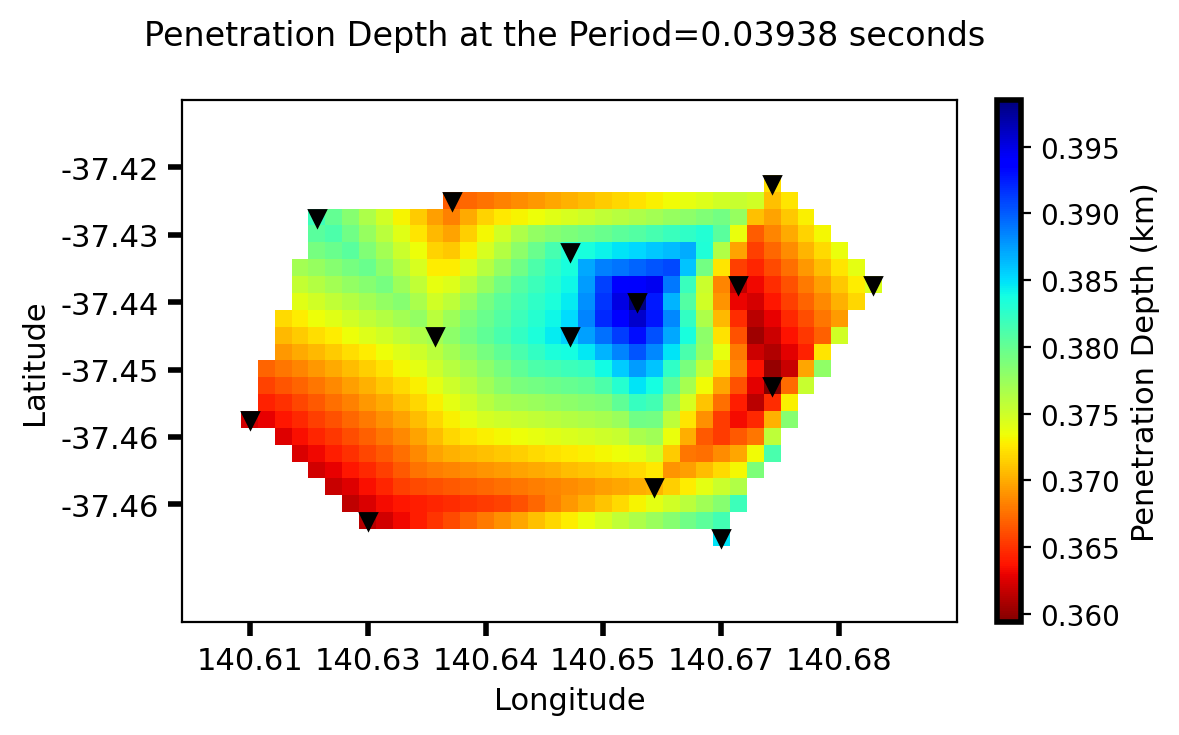

C:\mtpywin\mtpy\mtpy\imaging\penetration.py:498: DeprecationWarning: Call to deprecated function or method get_period_fmt (this function is added only to compatible with the old script penetration_depth3d.py).
  if self._fig is not None:


In [3]:
#Import required modules
from mtpy.imaging import penetration_depth3d as pen3d

# Set path to edi files to include in the plot and define savepath
edi_path = r'C:/mtpywin/mtpy/examples/data/edi2'
savepath = r'C:/tmp'

# Create plot for period index number 10 for determinant
pen3d.plot_latlon_depth_profile(edi_path, 10, 'det', showfig=True, 
                                savefig=True, savepath=savepath, 
                                fontsize=11, fig_dpi=400, file_format='png')

## Phase tensor plotting

In the next examples we will plot phase tensor maps (after Caldwell et al., 2004 & Bibby et al. 2005) and induction vectors. In these and later maps, there are many different parameters that can be varied, and generally there will be some tweaking that will need to be done to get the parameters (e.g. ellipse scaling) perfect for publication-quality plots. Note that some parameter tweaks can be done later (e.g. in Adobe Illustrator or Inkscape) if you save the plot to a vector graphic format like .eps and we recommend this as it can take hours to get all the parameters perfect!

### Phase tensor maps

In this example we plot all edi files from a directory as a phase tensor map for a selected frequency, with real induction vectors (Parkinson convention) overlain. There are quite a few parameters you can adjust, feel free to spend some time with this example updating them and viewing the result.

C:\W10DEV\Anaconda3\lib\site-packages\osgeo\gdal.py:107: DeprecationWarning: gdalconst.py was placed in a namespace, it is now available as osgeo.gdalconst
  DeprecationWarning)
C:\mtpywin\mtpy\mtpy\utils\calculator.py:365: RuntimeWarning: invalid value encountered in double_scalars
  z_rel_err = error/z_amp


Reading 14 stations


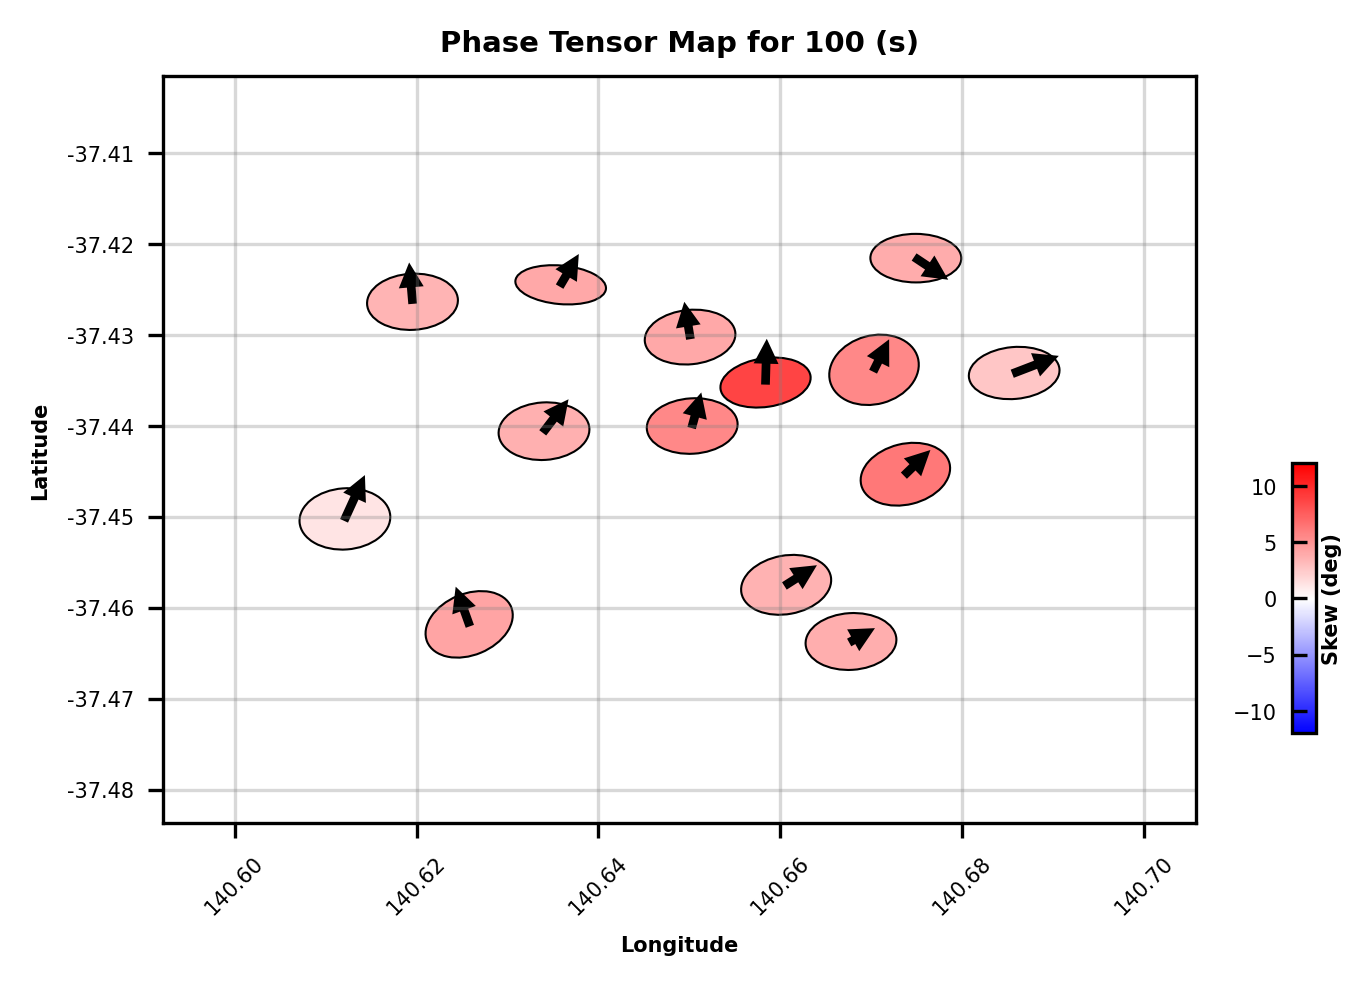

<Figure size 432x288 with 0 Axes>

In [4]:
# Import required modules
from mtpy.imaging.phase_tensor_maps import PlotPhaseTensorMaps
import os

import matplotlib.pyplot as plt


# directory containing edis
edi_path = r'C:/mtpywin/mtpy/examples/data/edi2'

# full path to file to save to
savepath = r'C:/tmp'

# frequency to plot
plot_freq = 1e-2

# name image according to plot frequency
image_fn = 'phase_tensor_map%1is'%(int(1./plot_freq))+'.png'

# gets edi file names as a list
edi_list = [os.path.join(edi_path,ff) for ff in os.listdir(edi_path) \
            if ff.endswith('.edi')]

# generate plot
ptmap = PlotPhaseTensorMaps(fn_list = edi_list,
                plot_freq = plot_freq , # frequency to plot
                fig_size = (4,3), # x, y dimensions of figure
                xpad = 0.02, ypad = 0.02, # pad around stations
                plot_tipper = 'yr', # 'y' + 'r' and/or 'i' to plot 
                                    # real and/or imaginary
                edgecolor='k', # a matplotlib colour or None for no borders
                lw=0.5, # linewidth for the ellipses
                minorticks_on=False, # whether or not to turn on minor ticks
                ellipse_colorby='skew', # 'phimin', 'phimax', or 'skew'
                ellipse_range = [-12,12,2], # [min,max,step]
                ellipse_size=0.01, # scaling factor for the ellipses
                arrow_size=0.1,
                arrow_head_width=0.002, # scaling for arrows (head width)
                arrow_head_length=0.002, # scaling for arrows (head length)
                ellipse_cmap='bwr', # matplotlib colormap
                station_dict={'id':(5,7)} ,
                cb_dict = {'position':
                           [1.05,0.2,0.02,0.3]}, # colorbar position [x,y,dx,dy]
                font_size=5
                )

# save the plot
ptmap.save_figure(os.path.join(savepath,image_fn))


If you want to plot some other image in the background (e.g. gravity) you can load it as follows & plot (the example below uses a Bouguer anomaly grid in netCDF format)

#### Note
For this example you will need to install netcdf4 if it's not there already. Type the following into your command prompt:

conda install netcdf4

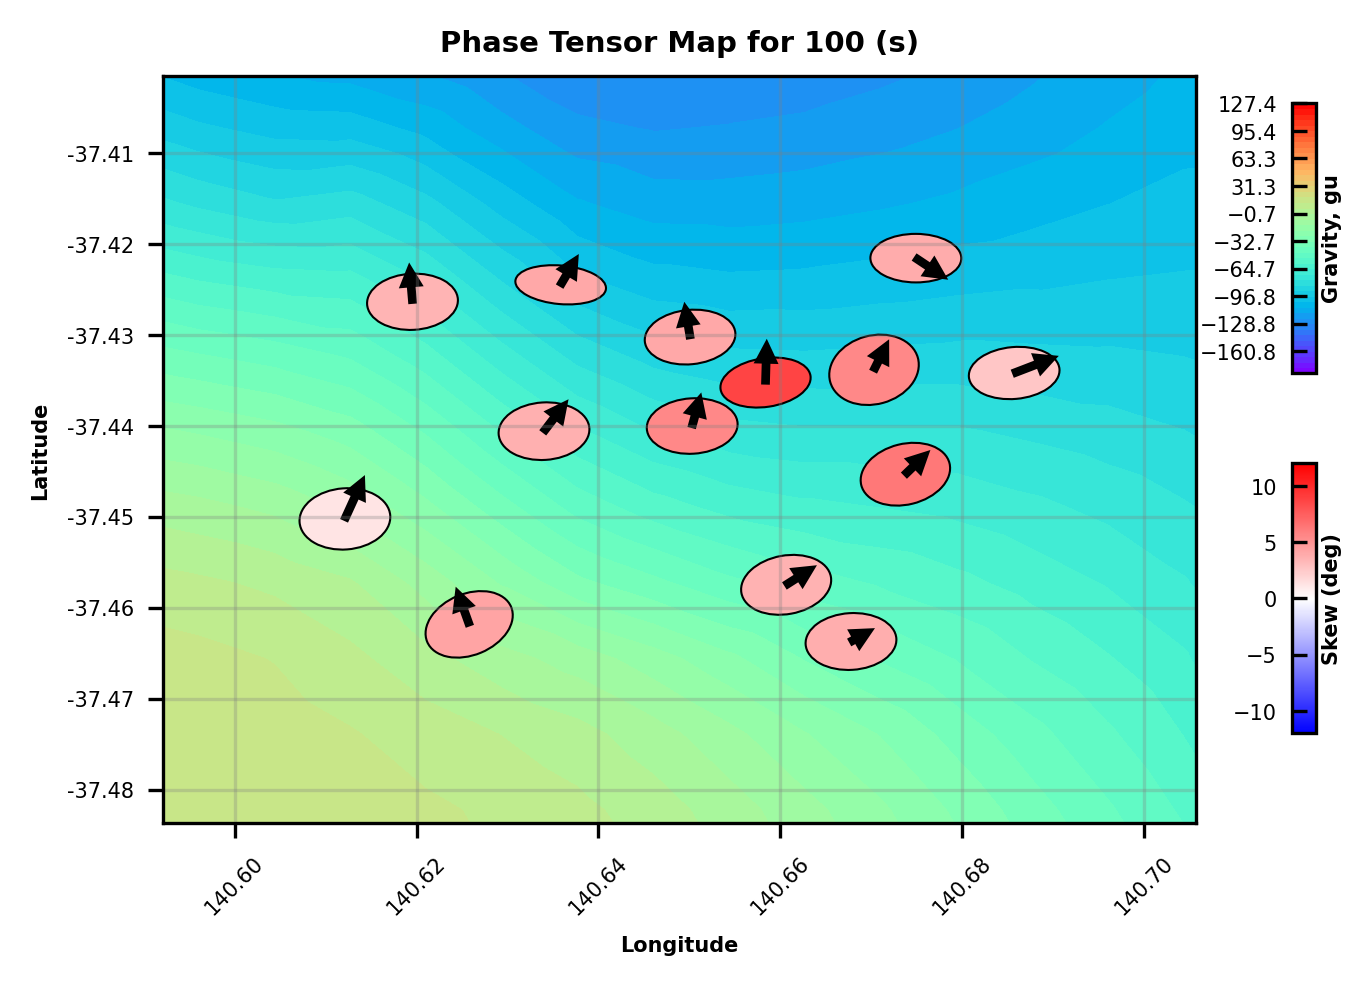

In [14]:
# Import the netCDF4 module
from netCDF4 import Dataset
import numpy as np

# load a netcdf file
grav = Dataset(r'C:/mtpywin/mtpy/examples/data/gravity/gravity.nc')
glon, glat = np.meshgrid(grav.variables['lon'],grav.variables['lat'])
vals = grav.variables['Band1'][:]

# remove no-data-values
data = vals.data.flatten()
mask = vals.mask.flatten()
filt = (1-mask).astype(bool)
glon = glon.flatten()[filt]
glat = glat.flatten()[filt]
data = data[filt]
               
ptmap.plot(show=True,
           raster_dict={'lons':glon.flatten(),
                        'lats':glat.flatten(),
                        'vals':data.flatten(),
                        'levels':50,
                        'cmap':'rainbow',
                        'cbar_title':'Gravity, gu',
                        'cbar_position':[1.05,0.6,0.02,0.3]}  )        


### Phase tensor sections

In this example we plot phase tensors for all frequencies from some edi files located along a transect.

Reading 28 stations
-------------------------
skew min = -76.25
skew max = 76.64
-------------------------


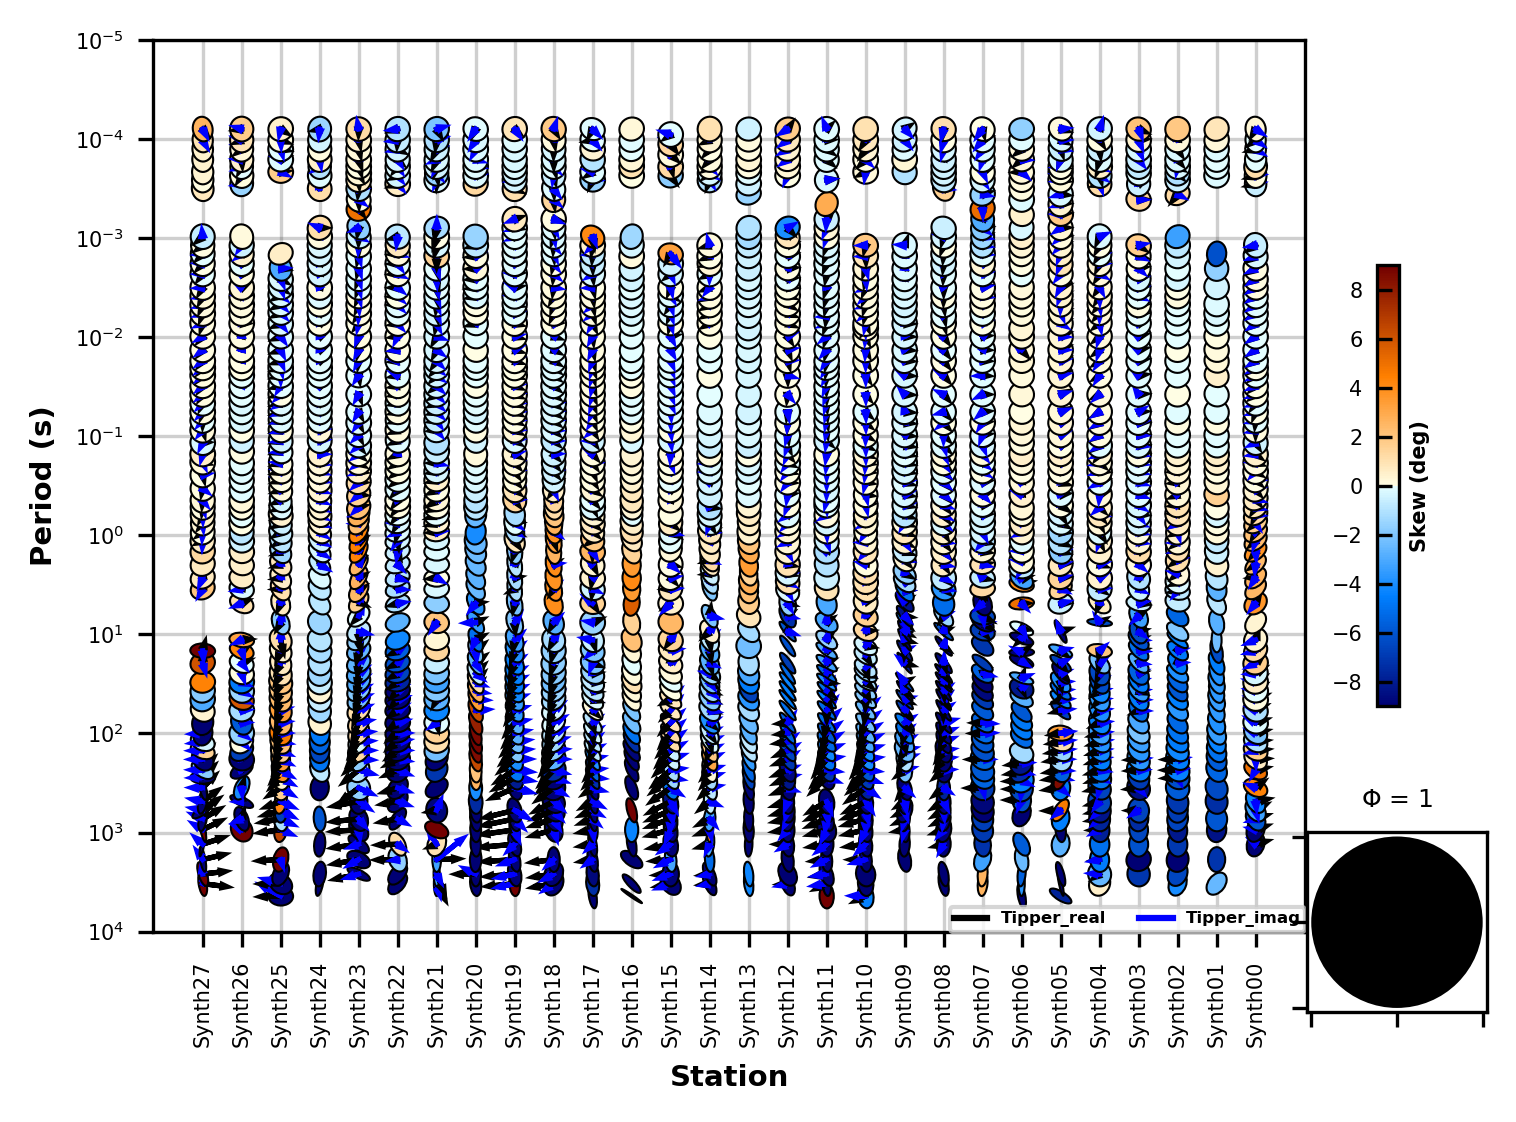

Saved figure to: C:/tmp\PhaseTensorSection.pdf


<Figure size 432x288 with 0 Axes>

In [16]:
# import required modules
from mtpy.imaging.phase_tensor_pseudosection import PlotPhaseTensorPseudoSection
import os

# path to edis
edi_path = r'C:/mtpywin/mtpy/examples/data/edi_files_2'

# save path
savepath = r'C:/tmp'

# edi list
edi_list=[os.path.join(edi_path,edi) for edi in os.listdir(edi_path) \
          if ((edi.endswith('.edi')))]

# dictionary containing ellipse properties
ellipse_dict = {'ellipse_colorby':'phimin', # phimin, phimax, skew, 
                                            # skew_seg
                'ellipse_range':[0,90]} # Color limits. If plotting 
                                        # skew_seg need to provide
                                        # 3 numbers, the 3rd indicates 
                                        # interval, e.g. [-12,12,3]

# create a plot object
ptsection = PlotPhaseTensorPseudoSection(fn_list = edi_list,
                linedir='ns', # 'ns' if the line is closer to north-south, 
                              # 'ew' if line is closer to east-west
                stretch=(17,8), # determines (x,y) aspect ratio of plot
                station_id=(0,10), # indices for showing station names
                plot_tipper = 'yri', # plot tipper ('y') + 'ri' for real+imag
                font_size=5,
                lw=0.5,
                
                                 )
ptsection.ellipse_size = 2.
ptsection.plot()

ptsection.save_figure(save_fn = os.path.join(savepath,'PhaseTensorSection.pdf'),
                    fig_dpi=400)

## Apparent resistivity and phase sections and maps

### Apparent resistivity maps

Plot apparent resitivity for a selected period, for an array of sites. Resistivity values are interpolated between sites

C:\mtpywin\mtpy\mtpy\imaging\plot_resphase_maps.py:390: DeprecationWarning: invalid escape sequence \O
  label = '$\\rho_{xx}  \\mathrm{[\Omega m]}$'
C:\mtpywin\mtpy\mtpy\imaging\plot_resphase_maps.py:392: DeprecationWarning: invalid escape sequence \c
  label = '$\\phi_{xx} \\mathrm{[^\circ]}$'
C:\mtpywin\mtpy\mtpy\utils\calculator.py:365: RuntimeWarning: invalid value encountered in double_scalars
  z_rel_err = error/z_amp


Reading 14 stations


C:\mtpywin\mtpy\mtpy\imaging\plot_resphase_maps.py:353: UserWarning: The following kwargs were not used by contour: 'mask'
  cmap=cmap)


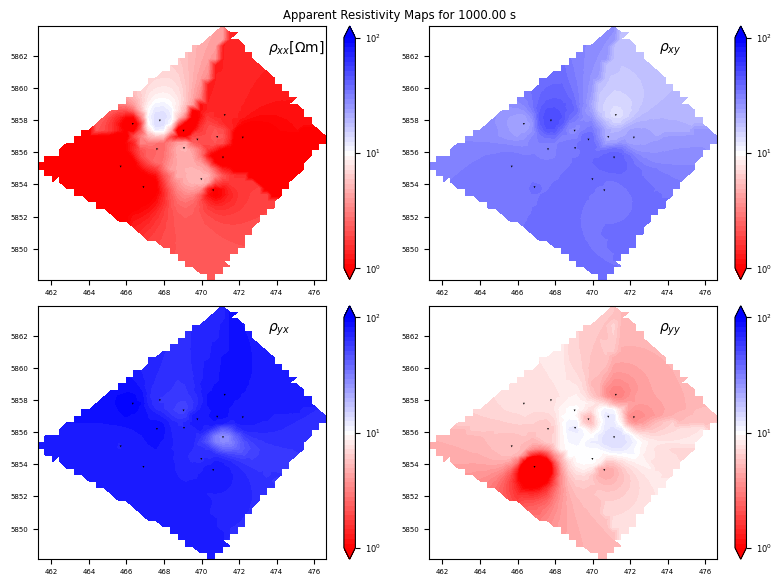

In [17]:
# Import required modules
from mtpy.imaging.plot_resphase_maps import PlotResPhaseMaps
import os

# Define edi path and save path
edipath = r'C:/mtpywin/mtpy/examples/data/edi2'
savepath = r'C:/tmp'

# Make an edi list
edi_list = [os.path.join(edipath,ff) for ff in os.listdir(edipath) \
            if ff.endswith('.edi')]

# Define plot frequency
freq = 0.001

# Initialise a plot object
prp = PlotResPhaseMaps(fn_list=edi_list,
                       mapscale='km')

# plot resistivity
f = prp.plot(freq, 
             'res', 
             1, 100, # limits in resistivity. Can be provided as a number
                     # or a 2x2 array to give different limits for
                     # different components
             nn=3, p=3,
             extrapolation_buffer_degrees=0.05, # how far to extrapolate
             regular_grid_nx=40, # number of x grid points 
             regular_grid_ny=40, # number of x grid points
             cmap='bwr_r', # colour map
             show=True)

# save plot
prp.fig.savefig(os.path.join(savepath,'Resistivity_%1is.png'%(1./freq)),
                dpi=300)


### Phase maps

Similarly, you can plot phase as an interpolated map.

C:\mtpywin\mtpy\mtpy\imaging\plot_resphase_maps.py:368: UserWarning: The following kwargs were not used by contour: 'mask'
  cmap=cmap)


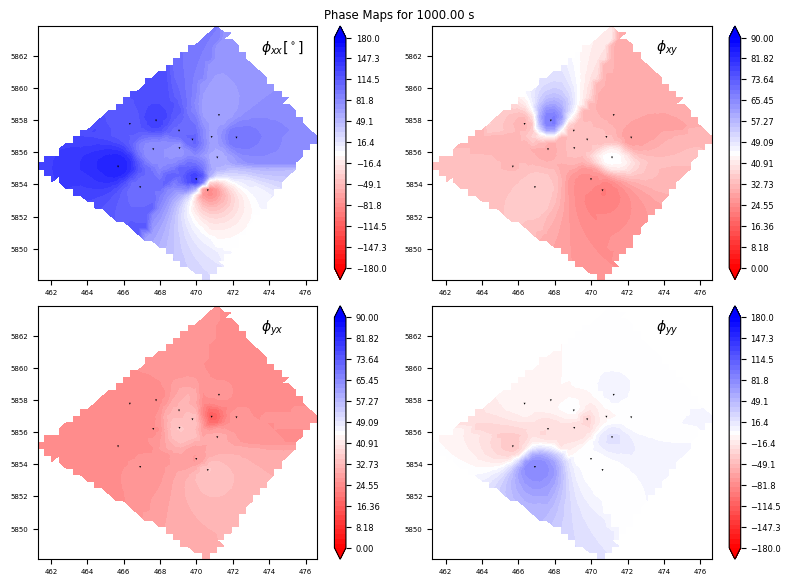

In [18]:
# plot phase
f = prp.plot(freq, # frequency to plot
             'phase', # phase or res
             np.array([[-180,0],   # minimum phase 
                       [0,-180]]), # for colour stretch
             np.array([[180,90],   # maximum phase
                       [90,180]]), # for colour stretch
             nn=3, p=3,
             extrapolation_buffer_degrees=0.05, # how far to extrapolate
             regular_grid_nx=40, # number of x grid points
             regular_grid_ny=40, # number of y grid points
             cmap='bwr_r', # colour map
             show=True)

# save plot
prp.fig.savefig(os.path.join(savepath,'Phase_%1is.png'%(1./freq)),dpi=300)

## Apparent resistivity and phase pseudosections

Plot apparent resistivity and phase as a function of period for several sites located along a transect

C:\mtpywin\mtpy\mtpy\imaging\plotpseudosection.py:875: DeprecationWarning: invalid escape sequence \O
  self.cbr.set_label('App. Res ($\Omega \cdot$m)',
C:\mtpywin\mtpy\mtpy\imaging\plotpseudosection.py:682: DeprecationWarning: invalid escape sequence \O
  self.cbr.set_label('App. Res ($\Omega \cdot$m)',


Reading 15 stations


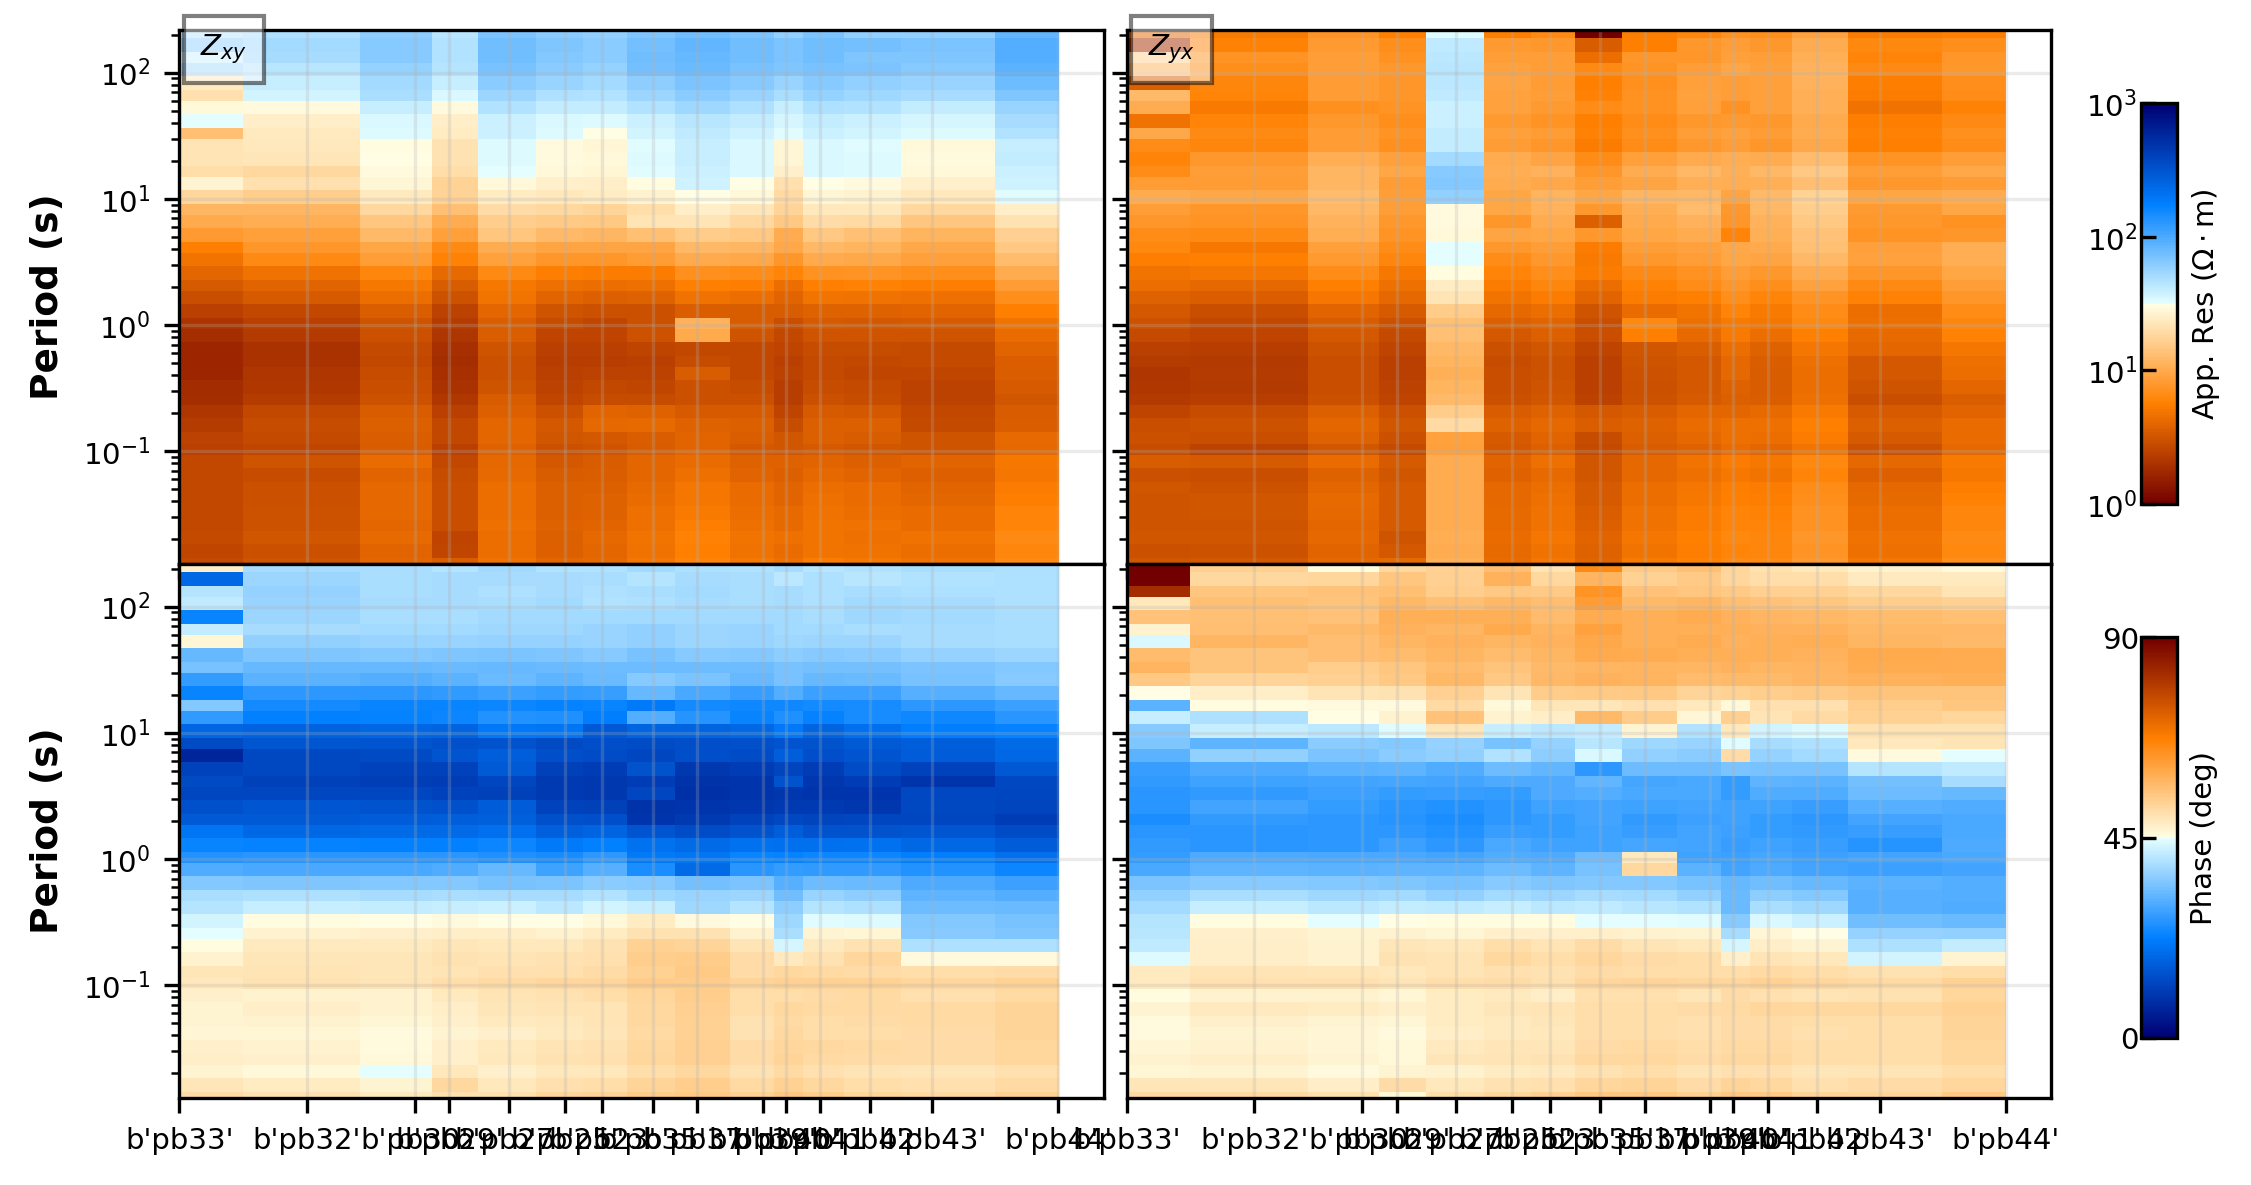

In [19]:
# Import required modules
import os
import mtpy.imaging.plotpseudosection as pps

# define edi path and savepath
edi_path = r'C:/mtpywin/mtpy/examples/data/edi_files'
savepath = r'C:/tmp'

# list all edi files in directory
edi_list = [os.path.join(edi_path,ff) for ff in os.listdir(edi_path) \
            if (ff.endswith('.edi'))]

# make a plot
pps.PlotResPhasePseudoSection(fn_list = edi_list,
                              linedir='ns', # 'ns' or 'ew' - approximate line 
                                            # orientation
                              plot_xx = 'n', # plot xx component 'y' or 'n'
                              plot_xy = 'y', # plot xy component 'y' or 'n'
                              plot_yx = 'y', # plot yx component 'y' or 'n'
                              plot_yy = 'n', # plot yy component 'y' or 'n'
                              res_limits=[0,3], # log resistivity limits
                              phase_limits=[0,90], # log phase limits
                              shift_yx_phase = True, # True or False
                              plot_style='pcolormesh' # 'pcolormesh' or 'imshow'
                             )